# Customer Churn Analysis and Prediction

## TASK 1 : DATA PREPARATION

### Loading Dataset 

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df1 = pd.read_csv("../data/Telco_Customer_Churn_Dataset.csv")
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes



### checking dataset if there is any missing values 


In [39]:
df1.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

##### there are 11 missing values in TotalCharges column 

##### changing missing values to mean of the column 

In [40]:
df2=df1.copy()
mean=df2.TotalCharges.mean()
df2.TotalCharges.fillna(mean,inplace=True)
df2.isnull().sum()

/tmp/ipykernel_14815/1682293325.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2.TotalCharges.fillna(mean,inplace=True)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [41]:
# basic statistics 
df2.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### removing duplicate values if there is 


In [42]:
df3=df2.drop_duplicates()
df3

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


#### there is no duplicate values 

### Converting Categorical Variable Churn Into Numerical 

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df4=df3.copy()

df4["Churn"] = le.fit_transform(df4["Churn"])
df4.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

## TASK 2 : EXPLORATORY DATA ANALYSIS ( EDA )

### Overall Churn Rate

Text(0, 0.5, 'Number of Customers')

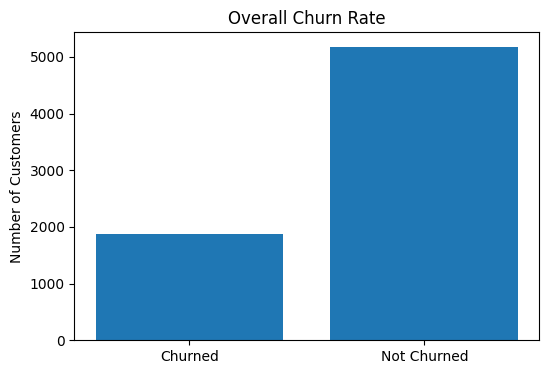

In [44]:
# Calculate overall churn rate
total_customers = len(df4)
churned_customers = df4[df4['Churn'] == 1]
churn_rate = (len(churned_customers) / total_customers) * 100

# Visualize overall churn rate
plt.figure(figsize=(6, 4))
plt.bar(['Churned', 'Not Churned'], [len(churned_customers), total_customers - len(churned_customers)])
plt.title('Overall Churn Rate')
plt.ylabel('Number of Customers')

### Customer distribution analysis


Text(0.5, 1.0, 'Customer Distribution by Dependents Status')

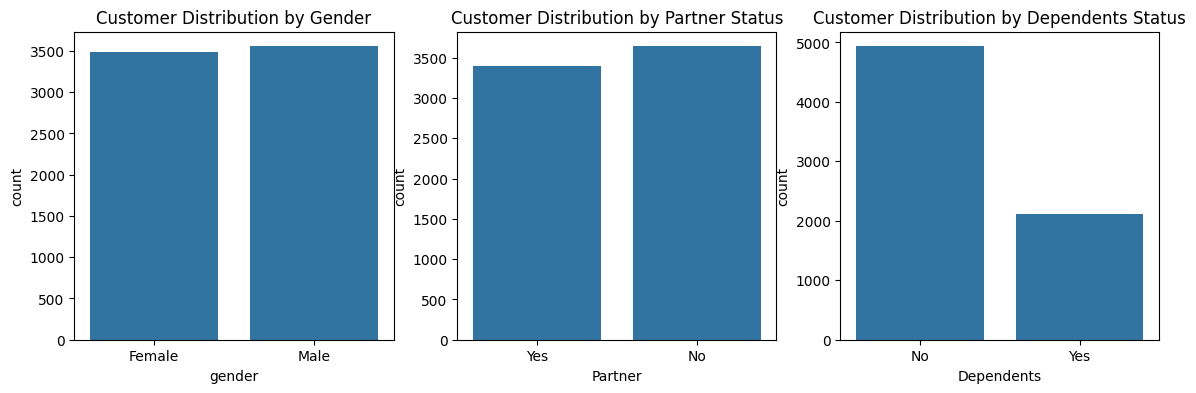

In [45]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
sns.countplot(x='gender', data=df4)
plt.title('Customer Distribution by Gender')

plt.subplot(1, 3, 2)
sns.countplot(x='Partner', data=df4)
plt.title('Customer Distribution by Partner Status')

plt.subplot(1, 3, 3)
sns.countplot(x='Dependents', data=df4)
plt.title('Customer Distribution by Dependents Status')


### Tenure distribution and churn analysis

Text(0.5, 0, 'Churn Status')

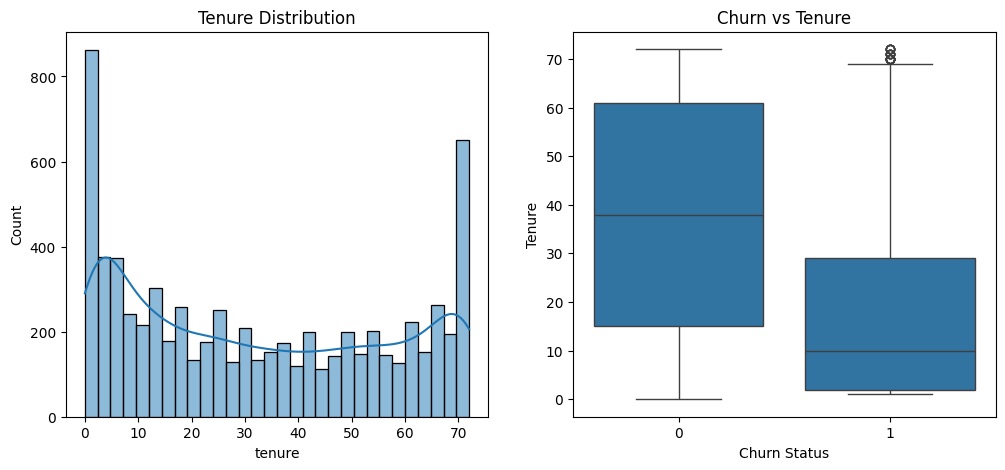

In [46]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df4['tenure'], bins=30, kde=True)
plt.title('Tenure Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='tenure', data=df4)
plt.title('Churn vs Tenure')
plt.ylabel('Tenure')
plt.xlabel('Churn Status')


### Churn variation across contract types and payment methods

([0, 1, 2, 3],
 [Text(0, 0, 'Bank transfer (automatic)'),
  Text(1, 0, 'Credit card (automatic)'),
  Text(2, 0, 'Electronic check'),
  Text(3, 0, 'Mailed check')])

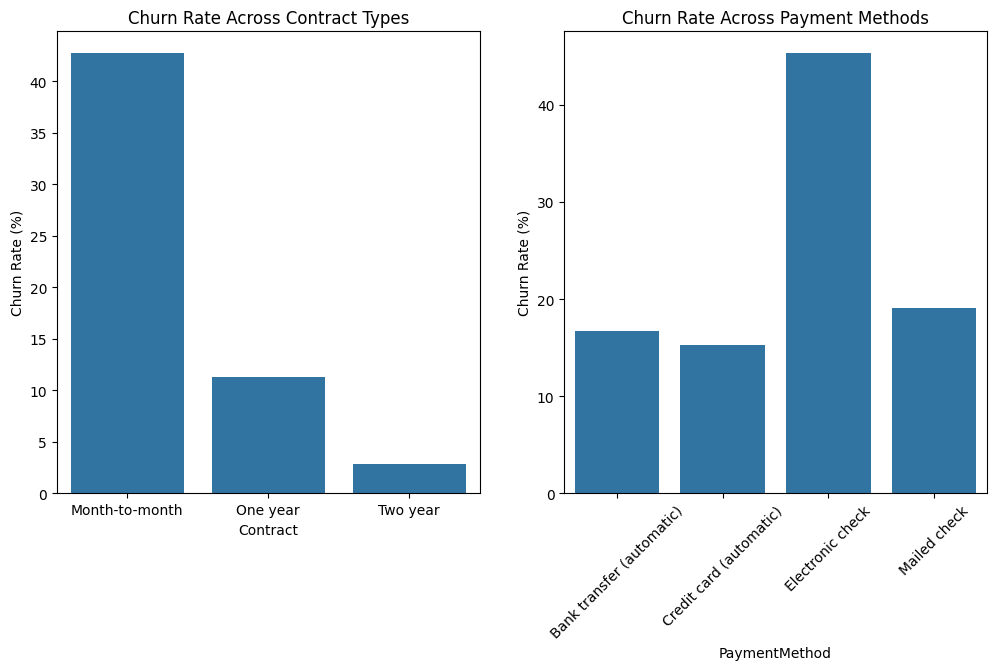

In [47]:
# Group data by Contract and calculate churn rate
contract_churn = df4.groupby('Contract')['Churn'].apply(lambda x: (x == 1).mean() * 100).reset_index()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Contract', y='Churn', data=contract_churn)
plt.title('Churn Rate Across Contract Types')
plt.ylabel('Churn Rate (%)')


# Group data by PaymentMethod and calculate churn rate
payment_churn = df4.groupby('PaymentMethod')['Churn'].apply(lambda x: (x == 1).mean() * 100).reset_index()
plt.subplot(1, 2, 2)
sns.barplot(x='PaymentMethod', y='Churn', data=payment_churn)
plt.title('Churn Rate Across Payment Methods')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)


## TASK 3 : CUSTOMER SEGMENTATION

### defining functions that returns the segment labels according to data

In [48]:
def tenure_segment(tenure):
    if tenure <= 12:
        return '0-12 months'
    elif 12 < tenure <= 24:
        return '13-24 months'
    else:
        return '25+ months'
    
    
def charges_segment(monthly_charges):
    if monthly_charges <= 50:
        return 'Low'
    elif 50 < monthly_charges <= 100:
        return 'Medium'
    else:
        return 'High'



### Printing High-value customers at risk of churning

In [49]:
df5=df4.copy()

# adding charges segment label column
df5['charges_segment'] = df5['MonthlyCharges'].apply(charges_segment)

# Identifying high-value customers at risk of churning
high_value_customers_at_risk = df5[(df5['charges_segment'] == 'High') & (df5['Churn'] == 1)]
print("these are the customers with high-value of churning")
high_value_customers_at_risk.head(5)

these are the customers with high-value of churning


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,charges_segment
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,High
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,High
38,5380-WJKOV,Male,0,No,No,34,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.35,3549.25,1,High
104,3192-NQECA,Male,0,Yes,No,68,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.00,7611.85,1,High
117,5299-RULOA,Female,0,Yes,Yes,10,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.25,1064.65,1,High


### Churn analysis by tenure, charges, and contract type

In [50]:
# adding tenure segment label column 
df5['tenure_segment'] = df5['tenure'].apply(tenure_segment)

# Churn analysis by tenure, charges, and contract type
churn_rate_by_segment = df5.groupby(['tenure_segment', 'charges_segment', 'Contract'])['Churn'].mean().reset_index()
print("Churn Rate by Segment:")
churn_rate_by_segment


Churn Rate by Segment:


,tenure_segment,charges_segment,Contract,Churn
0,0-12 months,High,Month-to-month,0.760000
1,0-12 months,High,One year,1.000000
2,0-12 months,Low,Month-to-month,0.358247
3,0-12 months,Low,One year,0.075269
4,0-12 months,Low,Two year,0.000000
5,0-12 months,Medium,Month-to-month,0.606164
6,0-12 months,Medium,One year,0.166667
7,0-12 months,Medium,Two year,0.000000
8,13-24 months,High,Month-to-month,0.596154
9,13-24 months,High,One year,0.333333


#### Visualizing using bar charts 

Text(0.5, 1.0, 'Churn Rate by Tenure and Monthly Charges Segments')

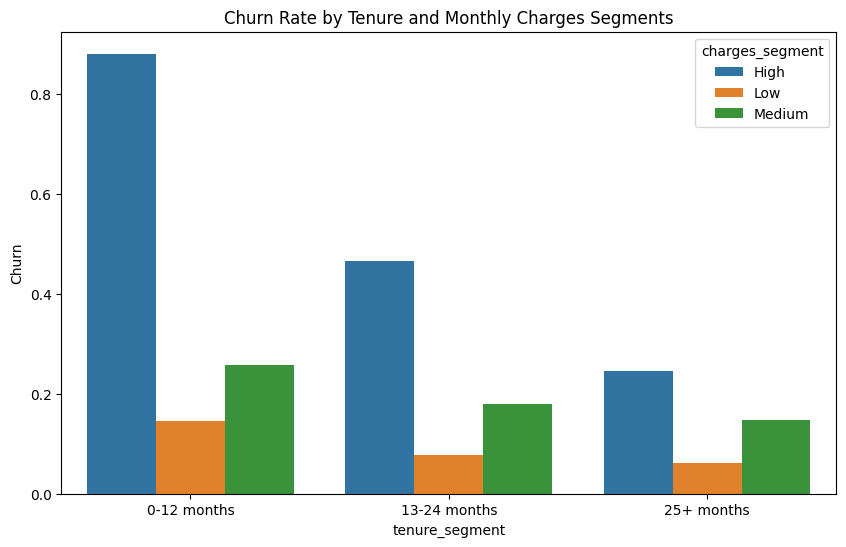

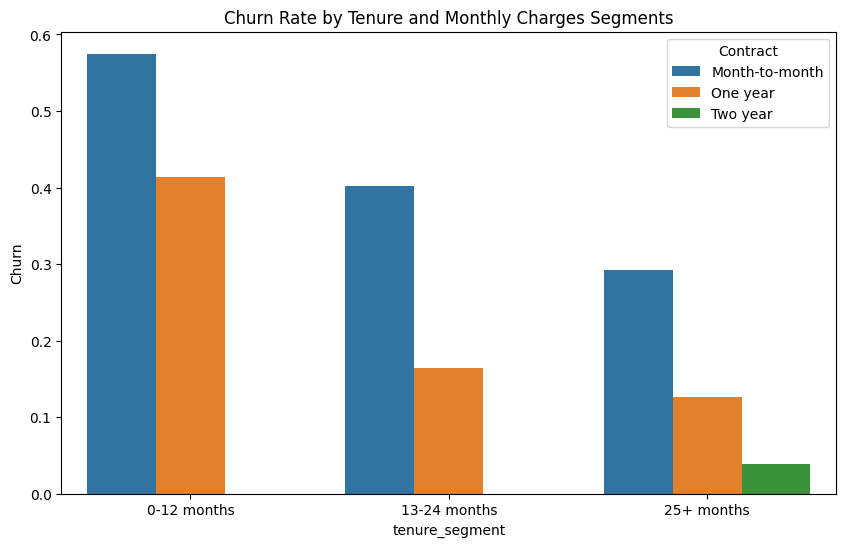

In [51]:
# Churn rate visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='tenure_segment', y='Churn', hue='charges_segment', data=churn_rate_by_segment , errorbar=None)

plt.title('Churn Rate by Tenure and Monthly Charges Segments')

# Churn rate visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='tenure_segment', y='Churn', hue='Contract', data=churn_rate_by_segment , errorbar=None)

plt.title('Churn Rate by Tenure and Monthly Charges Segments')



### visualizing using heat map

/tmp/ipykernel_14815/2466839721.py:2: FutureWarning: The provided callable <function mean at 0x7140182ae830> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data = churn_rate_by_segment.pivot_table(


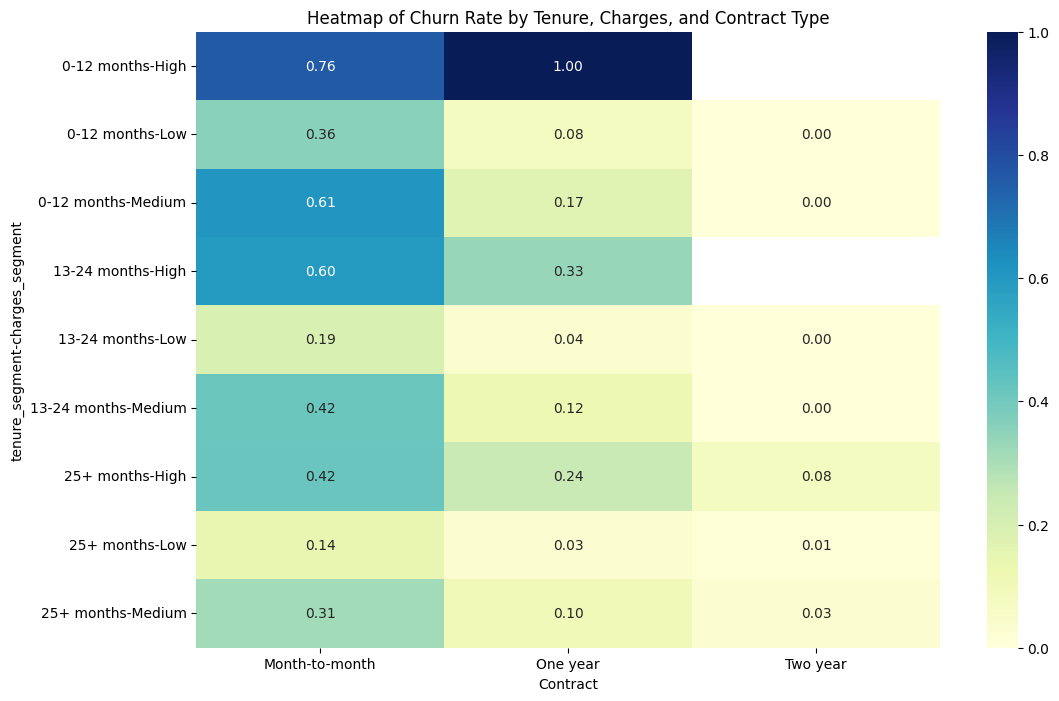

In [52]:
# Prepare data for heatmap
heatmap_data = churn_rate_by_segment.pivot_table(
    values='Churn',
    index=['tenure_segment', 'charges_segment'],
    columns='Contract',
    aggfunc=np.mean
)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Heatmap of Churn Rate by Tenure, Charges, and Contract Type')
plt.show()


## TASK 4 : Churn Prediction Model

### Converting all Categorical Variable into numerical for model building 

In [53]:
le = LabelEncoder()
df6=df5.copy()
df6.drop(columns={"customerID"},inplace=True)


df6["gender"] = le.fit_transform(df6["gender"])
df6["Partner"] = le.fit_transform(df6["Partner"])
df6["PhoneService"] = le.fit_transform(df6["PhoneService"])
df6["MultipleLines"] = le.fit_transform(df6["MultipleLines"])
df6["InternetService"] = le.fit_transform(df6["InternetService"])
df6["OnlineSecurity"] = le.fit_transform(df6["OnlineSecurity"])
df6["OnlineBackup"] = le.fit_transform(df6["OnlineBackup"])
df6["DeviceProtection"] = le.fit_transform(df6["DeviceProtection"])
df6["TechSupport"] = le.fit_transform(df6["TechSupport"])
df6["StreamingTV"] = le.fit_transform(df6["StreamingTV"])
df6["StreamingMovies"] = le.fit_transform(df6["StreamingMovies"])
df6["Contract"] = le.fit_transform(df6["Contract"])
df6["PaperlessBilling"] = le.fit_transform(df6["PaperlessBilling"])
df6["PaymentMethod"] = le.fit_transform(df6["PaymentMethod"])
df6["charges_segment"] = le.fit_transform(df6["charges_segment"])
df6["tenure_segment"] = le.fit_transform(df6["tenure_segment"])
df6["Dependents"] = le.fit_transform(df6["Dependents"])
df6

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,charges_segment,tenure_segment
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,1,2,29.85,29.85,0,1,0
1,1,0,0,0,34,1,0,0,2,0,...,0,0,1,0,3,56.95,1889.50,0,2,2
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,1,3,53.85,108.15,1,2,0
3,1,0,0,0,45,0,1,0,2,0,...,0,0,1,0,0,42.30,1840.75,0,1,2
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,1,2,70.70,151.65,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,...,2,2,1,1,3,84.80,1990.50,0,2,1
7039,0,0,1,1,72,1,2,1,0,2,...,2,2,1,1,1,103.20,7362.90,0,0,2
7040,0,0,1,1,11,0,1,0,2,0,...,0,0,0,1,2,29.60,346.45,0,1,0
7041,1,1,1,0,4,1,2,1,0,0,...,0,0,0,1,3,74.40,306.60,1,2,0


### Applying Feature Selection for Model and Splitting Dataset Into Train and Test 

In [54]:
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score



x=df6.drop(columns={"Churn"})
y=df6.Churn


# Apply feature selection using SelectKBest with ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=11)  # Select top 10 features
x_new = selector.fit_transform(x,y)
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.2,random_state=20)

# Get selected feature names (example)
selected_features = x.columns[selector.get_support(indices=True)]

# Train a model with the selected features
model = GradientBoostingClassifier(n_estimators = 93, random_state = 42)
model.fit(x_train,y_train)

# Evaluate model performance
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)                     # 
print(selected_features)

0.8289567068843151
Index(['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'tenure_segment'],
      dtype='object')


#### best fit feature are 13 in this dataset 

### Checking Which Model Has Best Predict Score 

In [55]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , confusion_matrix ,precision_score, recall_score, f1_score


# creating a dictionary for storing the models 
models = {
    # "SVM" : SVC(kernel ='linear'),
    "RandomForest" : RandomForestClassifier(n_estimators = 100, random_state = 42),
    "GradientBoosting" : GradientBoostingClassifier(n_estimators = 100, random_state = 42),
    "KNeighbors" : KNeighborsClassifier(n_neighbors = 5),
    "MultinomialNB" : MultinomialNB()
}


for model_name , model in models.items():
    # fiting the data in the model 
    model.fit(x_train,y_train)

    # test model 
    predictions = model.predict(x_test)

    precision = precision_score(y_test,predictions)
    recall = recall_score(y_test, predictions)
    f1= f1_score(y_test,predictions)
    #Accuracy  
    accuracy = accuracy_score(y_test, predictions)

    # calcualting confusion matrix 
    cm = confusion_matrix(y_test,predictions)

    print(f"{model_name}  Accuarcy : {accuracy}")
    print(f"precision score : {precision}")
    print (f"recall score : {recall}")
    print(f"f1 : {f1}")

    print(f"{model_name}  Confusion matrix {cm}")
    print(np.array2string(cm ,separator=", "),"\n")


RandomForest  Accuarcy : 0.8048261178140526
precision score : 0.6141479099678456
recall score : 0.5520231213872833
f1 : 0.5814307458143074
RandomForest  Confusion matrix [[943 120]
 [155 191]]
[[943, 120],
 [155, 191]] 

GradientBoosting  Accuarcy : 0.8289567068843151
precision score : 0.6755852842809364
recall score : 0.5838150289017341
f1 : 0.6263565891472869
GradientBoosting  Confusion matrix [[966  97]
 [144 202]]
[[966,  97],
 [144, 202]] 

KNeighbors  Accuarcy : 0.7792760823278921
precision score : 0.5566343042071198
recall score : 0.49710982658959535
f1 : 0.5251908396946565
KNeighbors  Confusion matrix [[926 137]
 [174 172]]
[[926, 137],
 [174, 172]] 

MultinomialNB  Accuarcy : 0.6848828956706884
precision score : 0.4236760124610592
recall score : 0.7861271676300579
f1 : 0.5506072874493927
MultinomialNB  Confusion matrix [[693 370]
 [ 74 272]]
[[693, 370],
 [ 74, 272]] 



#### According To This Code the GradientBoosting Algorithm is Giving us Best Score 

### Setting Attributes GradientBoosting So That it Gives More Accurate Score

In [56]:
import pickle 
model=GradientBoostingClassifier(n_estimators = 95, random_state = 42)

model.fit(x_train,y_train)

# test model 
predictions = model.predict(x_test)

#Accuracy  
precision = precision_score(y_test,predictions)
recall = recall_score(y_test, predictions)
f1= f1_score(y_test,predictions)
#Accuracy  
accuracy = accuracy_score(y_test, predictions)

# calcualting confusion matrix 
cm = confusion_matrix(y_test,predictions)

print(f"{model_name}  Accuarcy : {accuracy}")
print(f"precision score : {precision}")
print (f"recall score : {recall}")
print(f"f1 : {f1}")

print(f"{model_name}  Confusion matrix {cm}")
print(np.array2string(cm ,separator=", "),"\n")




MultinomialNB  Accuarcy : 0.8289567068843151
precision score : 0.6755852842809364
recall score : 0.5838150289017341
f1 : 0.6263565891472869
MultinomialNB  Confusion matrix [[966  97]
 [144 202]]
[[966,  97],
 [144, 202]] 



#### this is the best score we get , so we work on it 

### Saving the Model 

In [57]:
import os
path="../model/model.pkl"
if os.path.exists(path):
    pass
else:
    with open(path,"wb") as f:
        pickle.dump(model,f)

## TASK 5 : Model Evaluation and Interpretation

###  Feature Importance Interpretation

In [58]:

print("Feature Importances")
feature_importances = model.feature_importances_
for i, feature in enumerate(selected_features):  
    print(f"{feature}: {feature_importances[i]:.4f}")


Feature Importances
Dependents: 0.0031
tenure: 0.1443
OnlineSecurity: 0.0867
OnlineBackup: 0.0129
DeviceProtection: 0.0019
TechSupport: 0.0587
Contract: 0.4295
PaperlessBilling: 0.0150
MonthlyCharges: 0.1625
TotalCharges: 0.0854
tenure_segment: 0.0002


### Plotting ROC Curve and AUC Calculation

In [59]:
from sklearn.metrics import  roc_curve, roc_auc_score
y_test_prob = model.predict_proba(x_test)[:, 1]  # Probability estimates for ROC curve
auc = roc_auc_score(y_test, y_test_prob)

# Print AUC score
print(f"AUC: {auc:.4f}")

AUC: 0.8555


#### Plotting  ROC Chart 

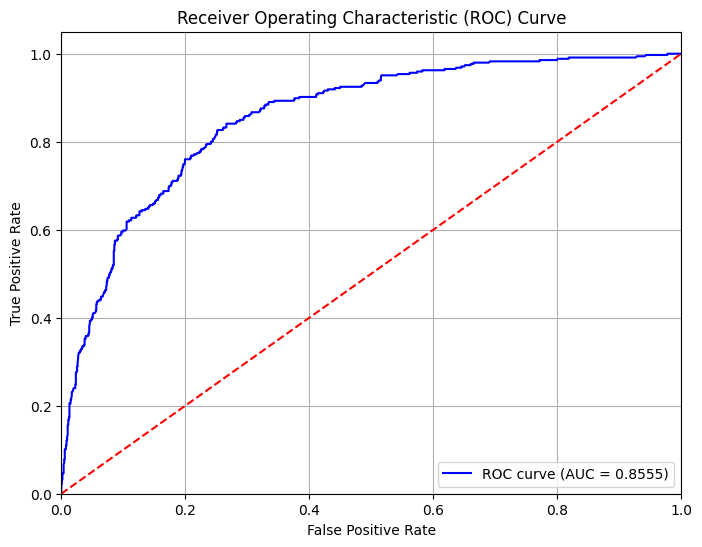

In [60]:
# Plot ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC curve (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()